#### importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

#### importing dataset

In [2]:
import chardet
with open('C:/Users/User/Desktop/internship/spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
data=pd.read_csv('C:/Users/User/Desktop/internship/spam.csv',encoding='Windows-1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
column_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data.drop(columns=column_drop, inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Cleaning data

In [7]:
# Drop duplicated values
data=data.drop_duplicates()
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [9]:
data.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


#### Visualizing data

In [10]:
data['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

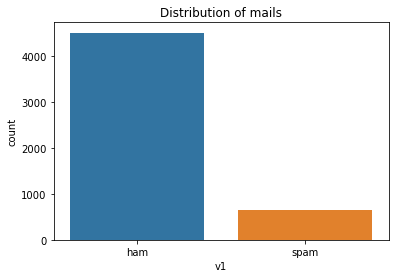

In [11]:
sns.countplot(data=data, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

####  Convert the "Category" column values to numerical representation

In [12]:
# Convert the "Category" column values to numerical representation(0 for "spam",1 for "ham")

data.loc[data["v1"] == "spam", "Category"] = 0
data.loc[data["v1"] == "ham", "Category"] = 1
data.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


#### Labeling column

In [13]:
Y = data['Category']
Y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Category, dtype: float64

In [14]:
X = data['v2']
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

#### Splitting the data into train and test data

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [16]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(3618,)
(1551,)


#### TF-IDF vectorizer to convert text messages to numerical features

In [17]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [18]:
print(X_train_features)

  (0, 274)	0.28469841570534354
  (0, 757)	0.2382703692823207
  (0, 309)	0.28469841570534354
  (0, 5479)	0.28469841570534354
  (0, 1666)	0.18521698912601275
  (0, 3176)	0.28469841570534354
  (0, 6726)	0.16969158756163835
  (0, 6243)	0.28469841570534354
  (0, 603)	0.24274243659325892
  (0, 2157)	0.1929056107731498
  (0, 6682)	0.2059490803121428
  (0, 6265)	0.15269186047504035
  (0, 5701)	0.24274243659325892
  (0, 6566)	0.16515206653974776
  (0, 6468)	0.23079712301516783
  (0, 2768)	0.21505634607080928
  (0, 4120)	0.22760511302317224
  (0, 234)	0.20290236667023745
  (0, 6626)	0.18521698912601275
  (1, 1536)	0.5888338190512723
  (1, 6486)	0.5280141801118141
  (1, 3501)	0.4067379480769643
  (1, 2132)	0.45720892460283746
  (2, 5579)	0.4697175168946937
  (2, 2524)	0.6743730717061566
  :	:
  (3612, 4940)	0.4429207609150278
  (3612, 3694)	0.38321599910309895
  (3612, 6141)	0.4110511297018481
  (3613, 3066)	1.0
  (3614, 782)	0.6262002443728721
  (3614, 2608)	0.468640976347078
  (3614, 5588)	0.36

In [19]:
print(Y_train)

2118    0
1019    1
1881    1
2575    1
4858    1
       ..
3534    1
1124    1
2628    1
3833    1
2694    1
Name: Category, Length: 3618, dtype: int32


#### Logistic Regression 

In [20]:
model = LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [21]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.01990049751244 %
Accuracy on test data: 95.80915538362346 %


[[ 129   62]
 [   3 1357]]


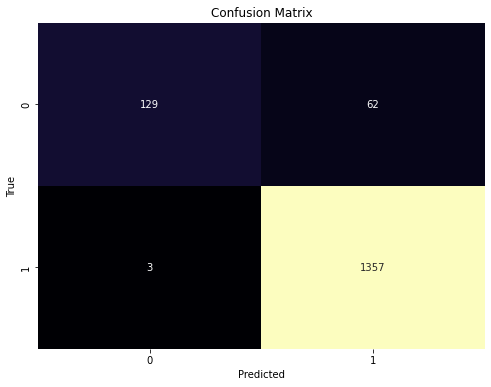

In [22]:
cm = confusion_matrix(Y_test,prediction_on_test_data)
print (cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="magma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

#### Support Vector Machines

In [23]:
model = SVC()
model.fit(X_train_features,Y_train)

SVC()

In [24]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 99.8065229408513 %
Accuracy on test data: 97.48549323017409 %


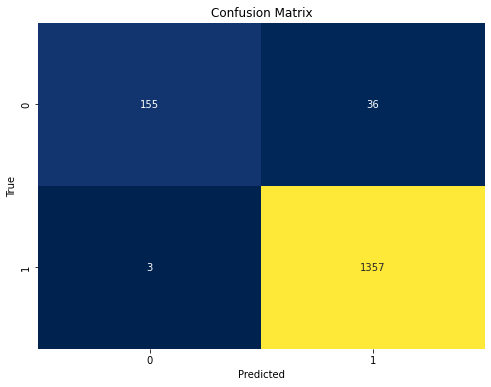

In [25]:
cm = confusion_matrix(Y_test,prediction_on_test_data)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="cividis", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

#### Naive Bayes classifier

In [26]:
model = MultinomialNB()
model.fit(X_train_features,Y_train)

MultinomialNB()

In [27]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 97.81647318960752 %
Accuracy on test data: 96.77627337201805 %


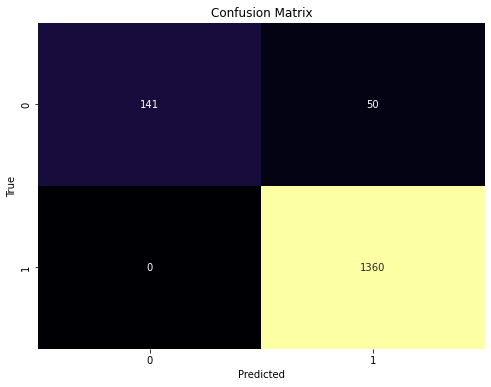

In [28]:
cm = confusion_matrix(Y_test,prediction_on_test_data)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="inferno", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()